## Using the N-Body Method
Having written an n-body function that represents the interactions, and bound the function to describe the gravitational force, lets try it out! You'll should assemble the code you've written so far into a file that can be imported. Move the ODE code you wrote into the same directory or create a package. Then experiment with the following algorithm/initial conditions.

### Euler Richardson

Begin by restructuring your ODE code and doing runs with initial conditions provided below: `figure_eight`,`lagrange_equilateral`,  and `butterfly`. Right now, our best algorithm is Euler-Richardson, so use that.

**Observation:** To ensure stability of orbits, some of these runs are requiring tens of seconds to minutes to make. Are we really condemned to such terrible performance?

#### What is stability?

When you plot results, you should see a departure from repeating orbits. That point is where the system becomes unstable. That can be hard to assess algorithmically. Instead find the point where the energy deviates from the initial energy by more than .5 percent.

To do this, compute and monitor the conservation of the total energy (that is potential plus kinetic). Total energy can be computed from the ODE output and monitored with a plot and analytic techniques.

Potential energy is

$$V_{ij} = -\frac{G m_i m_j}{r_{ij}}$$

where unlike force, potential energy *only counts once for each pair*. This would amount to the entries in the upper triangle of a $V$ matrix. Indeed, I think the way to compute this is with nested loops, quite similar to what was done for our forces in the n-body calculation.

Kinetic energy is

$$KE_i = \frac{1}{2} m_i v_i^2$$

for each body $i$.

The sum $KE +V$ for all particles is the total energy of the system. This should remain a constant through the simulation.

**Note on calculation:** Compute the potential, kinetic, and total energy from the final array of state vectors that are given back by the ODE solver.

#### Question:
Use Euler-Richardson integrate each of the initial conditions through 100 time units and plot the resulting trajectory, and total energy. Adjust the time step to find a value where the orbit is stable through the entire 100 unit interval. Note there are cases that can not be completed with stable orbits. Make note of them and find the point when the energy differs from the initial energy by more than .5 percent. Report when this time occurs. Use the `time` module and function to determine the wall clock time required for the runs. Record the times and step requirements for future reference. Also, make an accounting of how many calls to the `n-body` function occur.

In [3]:

# The most famous stable solution. All bodies follow the same '8' path.
figure_eight = np.array([
    0.97000436, -0.24308753,    # x1, y1
    -0.97000436, 0.24308753,    # x2, y2
    0.0, 0.0,                   # x3, y3
    0.466203685, 0.43236573,    # vx1, vy1
    0.466203685, 0.43236573,    # vx2, vy2
    -0.93240737, -0.86473146    # vx3, vy3
])
# Stable rotation. Distances remain constant, so forces are steady.
lagrange_equilateral = np.array([
    1.0, 0.0,                   # x1, y1
    -0.5, 0.86602540378,        # x2, y2
    -0.5, -0.86602540378,       # x3, y3
    0.0, 0.8,                   # vx1, vy1
    -0.692820323, -0.4,         # vx2, vy2
    0.692820323, -0.4           # vx3, vy3
])

# Intricate loops. High accelerations during tight turns challenge fixed steps.
butterfly = np.array([
    1.0, 0.0,                   # x1, y1
    -1.0, 0.0,                  # x2, y2
    0.0, 0.0,                   # x3, y3
    0.30689, 0.12551,           # vx1, vy1
    0.30689, 0.12551,           # vx2, vy2
    -0.61378, -0.25102          # vx3, vy3
])

# Plot function, use or not, but can be helpful for debugging.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML

%matplotlib inline

def show_anim(t_s,y,trace_length=20,out_time=.05):  
    plt.style.use('dark_background')
    d = 2
    c=['tab:red','tab:olive','tab:pink','tab:cyan','tab:purple']
    body_list = []
    trace_list = []

    K = int(out_time/dt)
    t_sd = t_s[::K]
    yd   = y[::K,:]

    fig = plt.figure(figsize=(10,10));
    ax = plt.axes()

    x_min,x_max,y_min,y_max = 1e9,-1e9,1e9,-1e9
    for i in range(0,y0.size//d,d):
        x_t = yd[:,i]
        y_t = yd[:,i+1]
        if x_min > x_t.min(): x_min = x_t.min()
        if x_max < x_t.max(): x_max = x_t.max()
        if y_min > y_t.min(): y_min = y_t.min()
        if y_max < y_t.max(): y_max = y_t.max()

        ph, =  ax.plot(x_t,y_t,'-',color=[.7,.7,.7],linewidth=.7);

    plt.xlim([1.2*x_min,1.2*x_max])
    plt.ylim([1.2*y_min,1.2*y_max])

    ax.axis('off')

    for i in range(0,y0.size//d,d):
        ph, =  ax.plot(y0[i],y0[i+1],'o',color=c[i//d]); 
        body_list.append( ph )
        ph, = ax.plot([],[],'-',color=c[i//d])
        trace_list.append( ph )

    def animate(i):
        i = i % (t_sd.size-1)
        for im,j in zip(body_list,range(0,d*len(body_list),d)):
            im.set_xdata( [yd[i+1,j]] )
            im.set_ydata( [yd[i+1,j+1]] )

        if i>trace_length:
            for im,j in zip(trace_list,range(0,d*len(trace_list),d)):
                im.set_xdata( yd[i-trace_length:i+1,j] )
                im.set_ydata( yd[i-trace_length:i+1,j+1] )
        return im

    anim = animation.FuncAnimation(fig, animate, interval=20,frames=t_sd.size-1) 
    return anim


# Function to compute the total energy given state array (state vector for a sequence of times.)
def total_energy(y,p):
    """
    INPUTS:
    y - the output of the ODE solver
    p - the parameters dictionary
    OUTPUT:
    the total energy at each time y is provided.
    """

Elapsed time = 0.694 seconds.


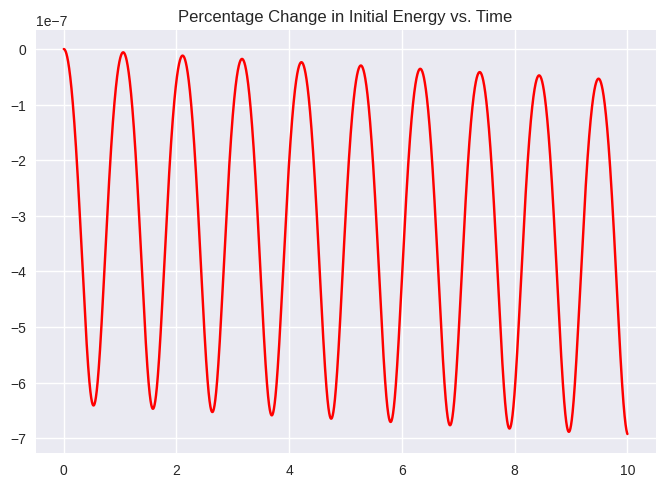

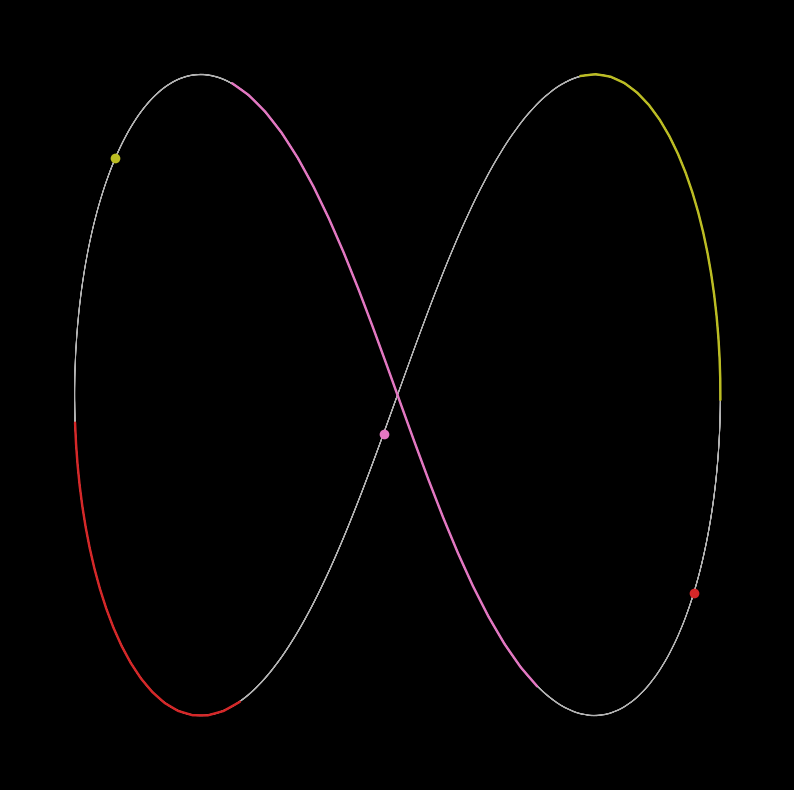

In [4]:
from ode import *
from n_body_rhs import *
from n_body_ic import *
import time

%matplotlib inline
y0 = figure_eight
p  = p3
dt = .001 
t_span = [0,10]
d=2

n_body.calls = 0

start_t = time.time()
t_s,y = solve_ode(n_body,t_span, y0, EulerRichardson, p, first_step=dt)

end_t = time.time()
print("Elapsed time = %4.3f seconds."%(end_t-start_t))

plt.style.use("seaborn-v0_8")
plt.axis("on")

E = total_energy(y,p)

E_p = (E-np.mean(E[:5]))/np.mean(E[:5])
plt.plot(t_s,E_p,'r')
plt.title("Percentage Change in Initial Energy vs. Time")

anim = show_anim(t_s,y)
HTML(anim.to_html5_video())

## Better ODE Solutions: Runge Kutta 4

The simplest to implement, but steadiest performance for ODE integration can be realized with the *fourth order Runge-Kutta* methods. If you are in a situation where you have to implement the algorithm yourself, this provides the greatest return on your time. It also shows the way forward, which is weighted averages of slopes evaluated throughout the interval. The following equations have errors of order $\mathcal{O}(\Delta t^5)$, meaning the log of error vs log of time step plot sees error decrease with a slope of five. That's fast!

Here are the equations:

$$
\begin{align}
k_1 &=& &h f(x_n,y_n)\\
k_2 &=& &h f(x_n + \frac{1}{2}h,y_n + \frac{1}{2} k_1)\\
k_3 &=& &h f(x_n + \frac{1}{2}h,y_n + \frac{1}{2} k_2)\\
k_4 &=& &h f(x_n + h,y_n +  k_3)
\end{align}
$$

$$y_{n+1} = y_n + \frac{1}{6} k_1 + \frac{1}{3} k_2 + \frac{1}{3} k_3 + \frac{1}{6} k_4 $$

Where I've broken with previous convention to generalize ($t_n \rightarrow x_n$) and simplify ($\Delta t \rightarrow h$).

Add an implementation of these methods to your ODE code.

#### Question:
Use Runge-Kutta 4 to integrate each of the initial conditions through 100 time units and plot the result. Adjust the time and find a point where the orbit stable through the entire time interval. Note cases that can not be completed without instabilities. Use the `time` module and function to determine the time required. Record the times and time step requirements for future reference. Also, make an accounting of how many function calls occur.

Evaluating Euler Richardson on the initial condition Figure Eight.
Evaluating Euler Richardson on the initial condition Lagrange Equalateral.


/tmp/ipykernel_584379/2853105027.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out_df = pd.concat([out_df,new_row])


Evaluating Euler Richardson on the initial condition Butterfly.
Evaluating Runge Kutta 4 on the initial condition Figure Eight.
Evaluating Runge Kutta 4 on the initial condition Lagrange Equalateral.
Evaluating Runge Kutta 4 on the initial condition Butterfly.


,Algorithm,Initial Conditions,Run Time (s),Time to instability (s),Function Calls,dt
0,Euler Richardson,Figure Eight,0.372838,100,20000,0.01
0,Euler Richardson,Lagrange Equalateral,0.286756,54.53,20000,0.01
0,Euler Richardson,Butterfly,0.271667,0.51,20000,0.01
0,Runge Kutta 4,Figure Eight,0.566108,100,40000,0.01
0,Runge Kutta 4,Lagrange Equalateral,0.611298,86.0,40000,0.01
0,Runge Kutta 4,Butterfly,0.582312,0.53,40000,0.01
